**케라스를 상요한 인공 신경망 소개**

지능적인 기계를 만드는 법을 뇌 구조에서 살펴봐 **인공 신경망 (Artificial neural network)(ANN)**을 개발함
- 뇌에 있는 생물학적 뉴런의 네트워크에서 영감을 받은 머신러닝 모델임
- 그렇다고 완전 모방과 비교는 버려야함

# 생물학적 뉴런에서 인공 뉴런까지

1943년 워런 매컬러와 수학자 월터 피츠가 소개함
- 꽤나 오랜 침체기
- 1980년대 초에 새로운 네트워크 구조가 발명되고 더 나은 훈련 기법이 개발되면서 **연결주의**에 대한 관심이 다시 살아남
- 1990년대에 SVM과 같은 머신러닝 기술이 개발되어 다시 또 긴 침체기
---
**딥러닝 발전 토대**
1. 데이터가 엄청 많아짐
2. 하드웨어 크게 발전
3. 훈련 알고리즘 향상
4. 인공 신경망의 이론상 제한이 실전에서는 문제가 되지 않는다고 밝혀짐
5. 인공 신경망이 투자와 진보의 선순환에 들어간 것으로 보임

## 생물학적 뉴런
**수상돌기** : 나뭇가지 모양의 돌기

**축삭돌기** : 아주 긴 돌기 


## 뉴런을 사용한 논리 연산

_생략_

## 퍼셉트론

가장 간단한 인공 신경망 구조임
- TLU(Threshold logic unit), LTU(Linear threshold unit)라고 불리는 인공 뉴런을 기반으로 함
- 입력과 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있음
- TLU는 입력의 가중치 합을 계산($z = w_1x_1 + w_2x_2 + \cdots + w_nx_n = x^Tw$)한 뒤 계산된 합에 **계단 함수**를 적용하여 결과를 출력함
- 즉 $h_w(x) = step(z)$ 여기서 $z = x^Tw$임

가장 널리 사용되는 계단 함수는 **헤비사이드 계단 함수**임
- 부호 함수를 대신 사용하기도 함

$\mbox{heaviside}(z) = \begin{cases}
0 & z < 0 일 때 \\
1 & z \ge 일 때
\end{cases}$ $\qquad \mbox{sgn}(z)=\begin{cases}
-1 & z < 0 일 때 \\
0 & z = 0 일 때 \\
+1 & z > 0 일 때
\end{cases}$

- 훈련한다는 것은 최적의 가중치를 찾는다는 뜻임
- 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때, 이를 **완전 연결 층** 또는 **밀집 층**이라고 부름
- 퍼셉트론의 입력은 **입력 뉴런**이라는 특별한 통과 뉴런에 주입됨
- **입력층**은 모두 입력 뉴런으로 구성됨
- 보통 거기에 **편향** 특성이 더해짐

**완전 연결 층의 출력 계산**

$h_{w,b}(X)=\phi(XW+b)$

- 프랑크 로젠블라트가 제안한 퍼셉트론의 훈련 알고리즘은 **헤브의 규칙**에서 영감을 많이 받음
    - 생물학적 뉴런이 다른 뉴런을 활성화시킬 때 이 두 뉴런의 연결이 더 강해짐
    - 두 뉴런이 동시에 활성화될 때마다 이들 사이의 연결 가중치가 증가함
- 퍼셉트론은 오차가 감소되도록 연결을 강화시킴
    - 한 번에 한 개의 샘플이 주입되면 각 샘플에 대해 예측이 만들어짐
        - 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있또록 입력에 연결된 가중치를 강화시킴

**퍼셉트론 학습 규칙(가중치 업데이트)**

$w_{i,j}^{(next step)}=w_{i,j}+\eta (y_j-\hat{y}_j)x_i$

- $\eta$는 학습률

- 각 출력 뉴런의 결정 경계는 선형이므로 퍼셉트론도 복잡한 패턴을 학습하지 못함
- 하지만 로젠블라트는 훈련 샘플이 선형적으로 구분될 수 있다면 이 알고리즘이 정답에 수렴한다는 것을 증명해냄
    - 이를 **퍼셉트론 수렴 이론**이라고 함
    

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(Iris setosa)인가?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

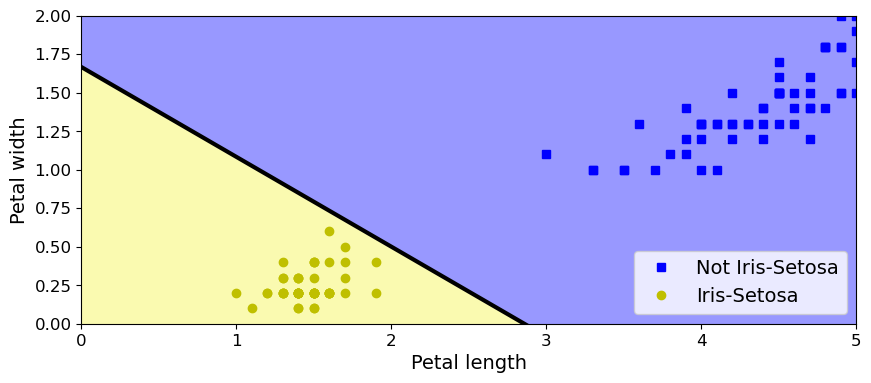

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# save_fig("perceptron_iris_plot")
plt.show()

- 로지스틱 회귀 분류기와 달리 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만들기 때문에, 로지스틱 회귀가 더 선호됨

퍼셉트론의 심각한 약점을 언급하면서 일부 간단한 문제를 풀 수 없음을 말함

--- 
퍼셉트론을 여러 개 쌓아올리면 일부 제약을 줄일 수 있다는 사실이 밝혀짐
- **다층 퍼셉트론(MLP)**


## 다층 퍼셉트론과 역전파

다층 퍼셉트론은 (통과) **입력층** 하나와 **은닉층**이라 불리는 하나 이상의 TLU 층과 마지막 **출력층**으로 구성됨
- 입력층과 가까운 층을 **하위 층**, 출력 층과 가까운 층을 **상위 층**이라고 부름

---
은닉층을 여러 개 쌓아 올린 인공 신경망을 **심층 신경망(DNN)**이라고 함
- 다층 퍼셉트론을 훈련할 방법을 찾기 위해 고군분투했지만 성공하지 못했음
- 1986년 **역전파(backpropagation)** 훈련 알고리즘이 나옴
- 그레이디언트를 자동으로 계산하는 경사 하강법임
---
하나의 미니배치씩 진행하여 전체 훈련 세트를 처리함
- 이런 과정을 여러 번 반복하며 각 반복을 **에포크**라고 부름

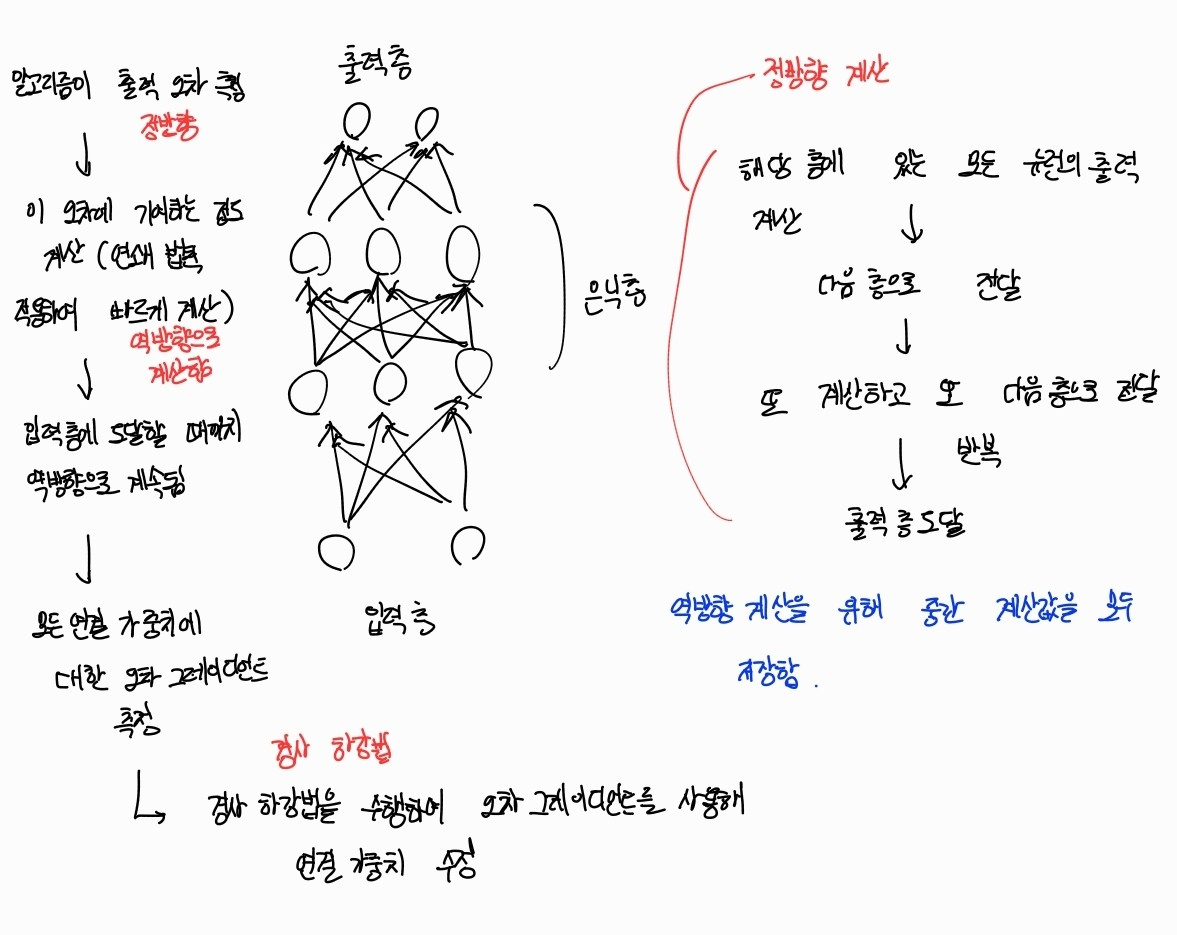

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

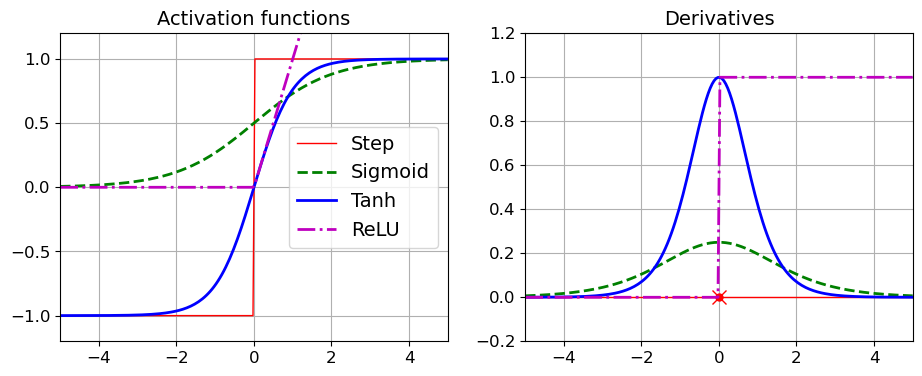

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
plt.show()

- 계단 함수말고 시그모이드 함수, Tanh함수, ReLU 함수를 사용함 
    - **그레이디언트 값 계산을 위해**

- 선형함수를 사용하지 말아야함
    - **선형함수 + 선형함수 = 선형함수로 하나의 층이랑 별 다를바 없기 때문**

## 분류를 위한 다층 퍼셉트론

각 샘플이 3개 이상의 클래스 중 한 클래스에만 속할 수 있다면 클래스마다 하나의 출력 뉴런이 필요함

- 이를 다중 분류라고 부름

확률 분포를 예측해야 하므로 손실 함수에는 일반적으로 크로스 엔트로피 손실을 선택하는 것이 좋음

|<span class="girk">하이퍼파라미터</span>|<span class="girk">이진 분류</span>|<span class="girk">다중 레이블 분류</span>|<span class="girk">다중 분류</span>|
|---|---|---|---|
|입력층과 은닉층|회귀와 동일|회귀와 동일|회귀와 동일|
|출력 뉴런 수|1개|레이블마다 1개|클래스마다 1개|
|출력층의 활성화 함수|로지스틱 함수|로지스틱 함수|소프트맥스 함수|
|손실 함수|크로스 엔트로피|크로스 엔트로피|크로스 엔트로피|

# 케라스로 다층 퍼셉트론 구현하기

## 케라스 설치
_생략_

## 시퀀셜 API를 사용하여 이미지 분류기 만들기

In [7]:
import tensorflow as tf
from tensorflow import keras

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

픽셀 강도를 255.0로 나누어 0~1 사이 범위로 조정해야함

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

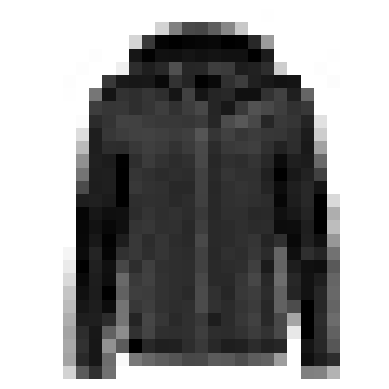

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [14]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
class_names[y_train[0]]

'Coat'

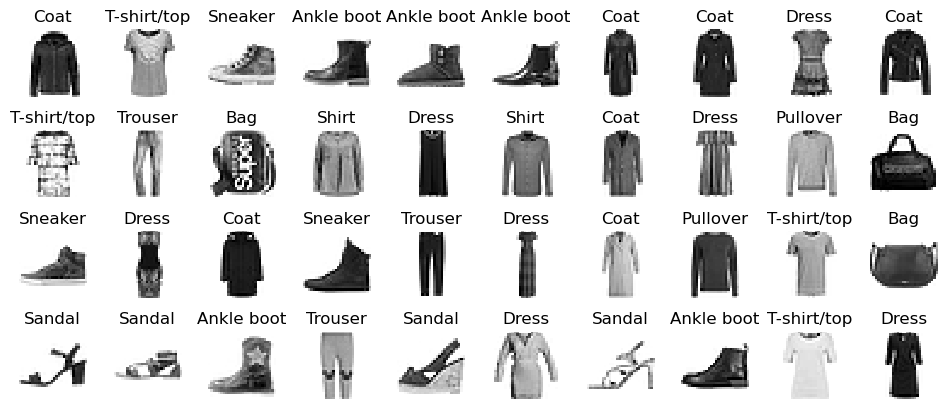

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
# save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

- Flatten 층은 1D 배열로 변환함
    - 간단한 전처리만 수행함

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 첫 번째 은닉층은 $784\times 300$개의 연결 가중치와 $300$개의 편향을 가짐

In [20]:
model.layers

In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
model.get_layer('dense_5') is hidden1

False

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.06829244,  0.04236946, -0.01598179, ...,  0.04641282,
        -0.03796706,  0.00554647],
       [ 0.06698851, -0.02925318, -0.05763417, ..., -0.02787291,
         0.00618019, -0.01358464],
       [-0.0519427 ,  0.02760005,  0.06294169, ...,  0.07097186,
        -0.07058195,  0.03789274],
       ...,
       [ 0.06273748,  0.07386324, -0.01386714, ..., -0.02107637,
        -0.03346186,  0.02823969],
       [ 0.0705618 , -0.0067614 ,  0.02919358, ...,  0.06379652,
         0.02105576,  0.00090247],
       [ 0.01346768,  0.01087082, -0.02266145, ...,  0.03128723,
         0.00408171, -0.02793801]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

다른 값으로 초기화하고 싶으면  kernel_initializer(**커널**은 연결 가중치 행렬의 또 다른 이름임)와 bias_initializer 매개변수를 설정할 수 있음

**모델 컴파일**

compile() 메서드를 호출하여 사용할 손실 함수와 옵티아미저를 지정해야함

In [26]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

- 클래스가 베타적이므로 sparse_categorical_crossentropy
    - 만일 원-핫 벡터면 categorical_crossentropy
- 만일 이진 분류나 다중 레이블 이진 분류를 수행한다면 출력층에 "softmax" 함수 대신 "sigmoid" 함수를 사용하고 "binary_crossentropy" 손실을 사용함

- 옵티마이저에 "sgd"를 지정하면 기본 확률적 경사 하강법을 사용하여 모델을 훈련한다는 의미임
- `optimizer=keras.optimizers.SGD(lr=???)`와 같이 사용하여 학습률을 지정함(lr 기본값 0.01)
- 분류기 이므로 훈련과 평가 시에 정확도를 측정하기 위해 "accuracy"를 지정함

**모델 훈련과 평가**

In [27]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7083 - accuracy: 0.7668 - val_loss: 0.4934 - val_accuracy: 0.8372
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4856 - accuracy: 0.8302 - val_loss: 0.4463 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4417 - accuracy: 0.8454 - val_loss: 0.4340 - val_accuracy: 0.8536
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4150 - accuracy: 0.8540 - val_loss: 0.3967 - val_accuracy: 0.8642
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3957 - accuracy: 0.8612 - val_loss: 0.3913 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3808 - accuracy: 0.8659 - val_loss: 0.3829 - val_accuracy: 0.8630
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3673 - accuracy: 0.8697 - val_loss: 0.3671 - val_accuracy:

에포크가 끝날 때마다 검증 세트를 사용해 손실과 추가적인 측정 지표를 계산함
- 모델이 얼마나 잘 수행되는지 확인하는 데 유용함


---
어떤 클래스는 많이 등장하고 다른 클래스는 조금 등장하여 훈련 세트가 편중되어 있다면 fit() 메서드를 호출할 때 class_weight 매개변수를 지정하는 것이 좋음
- 적게 등장하는 클래스는 높은 가중치를 부여하고 많이 등장하는 클래스는 낮은 가중치를 부여함
- 손실을 계산할 때 이 가중치를 사용함
- 샘플별로 가중치를 부여하고 싶다면 sample_weight 매개변수를 지정함
- validation_data 튜플의 세 번째 원소로 검증 세트에 대한 샘플별 가중치를 지정할 수도 있음


--- 
fit() 메서드가 반환하는 History 객체에는 훈련 파라미터(history.params), 수행된 에포크 리스트 (history.epoch)가 포함됨


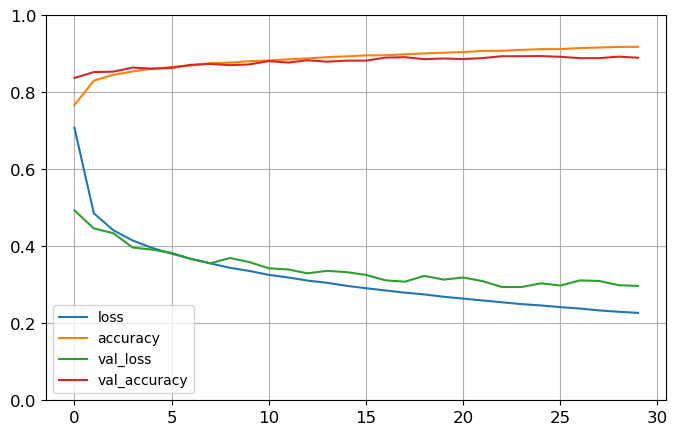

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # 수직축의 범위를 [0-1] 사이로 설정함
plt.show()

- 훈련하는 동안 훈련 정확도와 검증 정확도가 꾸준히 상승하는 것을 볼 수 있음
---
- 모델의 상용 환경으로 배포하기 전에 테스트 세트로 모델을 평가하여 일반화 오차를 추정해야함
    - evaluate() 메서드 사용함

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 993us/step - loss: 0.3349 - accuracy: 0.8798


[0.3349020481109619, 0.879800021648407]

테스트 세트에서 하이퍼파라미터를 튜닝하려는 유혹을 참아야함. 그렇지 않으면 일반화 오차를 매우 낙관적으로 추정함

**모델을 사용해 예측을 만들기**

predict() 메서드를 사용해 새로운 샘플에 대해 예측을 만들 수 있음

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 66ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [35]:
np.argmax(y_proba, axis=1)

array([9, 2, 1], dtype=int64)

In [36]:
np.array(class_names)[np.argmax(y_proba, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

사이킷런의 fetch_california_housing() 함수를 사용해 데이터를 적재함

In [38]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

시퀀셜 API를 사용해 회귀용 MLP를 구축, 훈련, 평가, 예측하는 방법은 분류에서 했던 것과 매우 비슷함
- 출력층이 활성화 함수가 없는 하나의 뉴런을 가진다는 것과 손실 함수로 평균 제곱 오차를 사용한다는 것임

In [40]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                   validation_data = (X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # 새로운 샘플이라고 생각함
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8062 - val_loss: 0.9365
Epoch 2/20
363/363 [==============================] - 0s 831us/step - loss: 0.5725 - val_loss: 0.5010
Epoch 3/20
363/363 [==============================] - 0s 808us/step - loss: 0.4751 - val_loss: 0.5424
Epoch 4/20
363/363 [==============================] - 0s 802us/step - loss: 0.4522 - val_loss: 0.4612
Epoch 5/20
363/363 [==============================] - 0s 795us/step - loss: 0.4399 - val_loss: 0.4541
Epoch 6/20
363/363 [==============================] - 0s 795us/step - loss: 0.4321 - val_loss: 0.4443
Epoch 7/20
363/363 [==============================] - 0s 832us/step - loss: 0.4201 - val_loss: 0.4452
Epoch 8/20
363/363 [==============================] - 0s 794us/step - loss: 0.4322 - val_loss: 0.4440
Epoch 9/20
363/363 [==============================] - 0s 798us/step - loss: 0.4202 - val_loss: 0.4499
Epoch 10/20
363/363 [==============================] - 0s 775us/step - loss: 0.4158 

Sequential 모델이 매우 널리 사용되지만 입력과 출력이 여러 개거나 더 복잡한 네트워크 토폴로지를 갖는 신경망을 만들어야 할 때가 있음
- 함수형 API를 제공함

## 함수형 API를 사용해 복잡한 모델 만들기

순차적이지 않은 신경망의 한 예는 와이드 & 딥 신경망임
- 2016년 형쯔 청의 논문에서 소개됨
- 입력의 일부 또는 전체가 출력층에 바로 연결됨
- 신경망이 복잡한 패턴과 간단한 규칙을 모두 학습할 수 있음
- 대조적으로 일반적인 MLP는 네트워크에 있는 층 전체에 모든 데이터를 통과시킴

In [42]:
X_train.shape[1:]

(8,)

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

1. Input 객체 선언함
- shape와 dtype을 포함하여 모델의 입력을 정의함
2. 30개의 뉴런과 ReLU 활성화 함수를 가진 Dense 층을 만듦
- 이 층은 만들어지자마자 입력과 함께 함수처럼 호출됨
    - 이를 함수형 API라고 부르는 이유임
3. 은닉층을 만들고 함수처럼 호출함
4. Concatenate 층을 만들고 또 다시 함수처럼 호출하여 두 번째 은닉층의 출력과 입력을 연결함
5. 뉴런과 활성화 함수가 없는 출력층을 만들고 Concatenate 층이 만든 결과를 사용해 호출함
6. Model을 만듦

---
일부 특성만 짧은 경로로 전달하고 다른 특성들은 깊은 경로로 전달하고 싶다면?
- 여러 입력을 사용하는 방법이 있음


In [43]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs= [output])

모델 컴파일은 이전과 동일하지만 fit() 메서드를 호출할 때 하나의 입력 행렬 X_train을 전달하는 것이 아니라 입력마다 하나씩 행렬의 튜플 (X_train_A, X_train_B)을 전달해야 함
- X_valid에도 동일하게 적용됨
- evaluate()나 predict()를 호출할 때 X_test, X_new에도 동일함

In [44]:
X_train.shape

(11610, 8)

In [46]:
X_train[:, :5].shape

(11610, 5)

In [47]:
X_train[:, 2:].shape

(11610, 6)

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5996 - val_loss: 0.7780
Epoch 2/20
363/363 [==============================] - 0s 873us/step - loss: 0.7224 - val_loss: 0.6713
Epoch 3/20
363/363 [==============================] - 0s 914us/step - loss: 0.6499 - val_loss: 0.6268
Epoch 4/20
363/363 [==============================] - 0s 831us/step - loss: 0.6092 - val_loss: 0.5960
Epoch 5/20
363/363 [==============================] - 0s 870us/step - loss: 0.5783 - val_loss: 0.5727
Epoch 6/20
363/363 [==============================] - 0s 870us/step - loss: 0.5540 - val_loss: 0.5524
Epoch 7/20
363/363 [==============================] - 0s 879us/step - loss: 0.5357 - val_loss: 0.5381
Epoch 8/20
363/363 [==============================] - 0s 878us/step - loss: 0.5210 - val_loss: 0.5289
Epoch 9/20
363/363 [==============================] - 0s 880us/step - loss: 0.5102 - val_loss: 0.5190
Epoch 10/20
363/363 [==============================] - 0s 918us/step - loss: 0.5012 

여러 개의 출력이 필요한 경우가 있음
- 여러 출력이 필요한 작업일 때
- 동일한 데이터에서 독립적인 여러 작업을 수행할 때
- 규제 기법으로 사용하는 경우 
    - 보조 출력을 추가할 수 있음

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

각 출력은 자신만의 손실 함수가 필요함
- 모델을 컴파일할 때 손실의 리스트를 전달해야함
- 하나의 손실을 전달하면 케라스는 모든 출력의 손실 함수가 동일하다고 가정함
- 케라스는 나열된 손실을 모두 더하여 최종 손실을 구해 훈련에 사용함
- 보조 출력보다 주 출력에 더 관심이 많으면 주 출력 손실에 더 많은 가중치를 부여함

In [52]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [54]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1192 - main_output_loss: 1.9249 - aux_output_loss: 3.8680 - val_loss: 1.1884 - val_main_output_loss: 0.9705 - val_aux_output_loss: 3.1499
Epoch 2/20
363/363 [==============================] - 0s 982us/step - loss: 1.0328 - main_output_loss: 0.8559 - aux_output_loss: 2.6246 - val_loss: 0.9218 - val_main_output_loss: 0.7632 - val_aux_output_loss: 2.3492
Epoch 3/20
363/363 [==============================] - 0s 954us/step - loss: 0.8670 - main_output_loss: 0.7377 - aux_output_loss: 2.0306 - val_loss: 0.8223 - val_main_output_loss: 0.6975 - val_aux_output_loss: 1.9448
Epoch 4/20
363/363 [==============================] - 0s 977us/step - loss: 0.7874 - main_output_loss: 0.6827 - aux_output_loss: 1.7301 - val_loss: 0.7635 - val_main_output_loss: 0.6580 - val_aux_output_loss: 1.7129
Epoch 5/20
363/363 [==============================] - 0s 988us/step - loss: 0.7358 - main_output_loss: 0.6449 - aux_output_loss: 1.5546 - 

In [56]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 16ms/step


## 서브클래싱 API로 동적 모델 만들기

시퀀셜 API와 함수형 API는 모두 선언적임
- 하지만 정적이라는 것이 단점임
    - 동적인 구조가 필요함
    - 서브클래싱 API가 정답임
   

Model 클래스를 상속한 다음 생성자 안에서 필요한 층을 만듦
- call() 메서드 안에 수행하려는 연산을 기술함


In [58]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # 표준 매개변수를 처리함 (예를 들면, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

함수형 API와 매우 비슷하지만 Input 클래스의 객체를 만들 필요가 없음
- 대신 call() 메서드의 input 매개변수를 사용함
- 생성자에 있는 층 구성과 call() 메서드에 있는 정방향 계산을 분리했음
- 주된 차이점은 call() 메서드 안에서 원하는 어떤 계산도 사용할 수 있다는 것임
---
유연성이 높아지면 그에 따른 비용이 발생함
- 케라스가 쉽게 분석하지 못함
- summary() 메서드를 호출하면 층 간의 연결 정보를 얻을 수 없음
- 높은 유연성이 필요하지 않는다면 시퀀셜 API와 함수형 API를 사용하는 것이 좋음

## 모델 저장과 복원

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [61]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.2137 - val_loss: 0.8693
Epoch 2/10
363/363 [==============================] - 0s 860us/step - loss: 0.7804 - val_loss: 0.6985
Epoch 3/10
363/363 [==============================] - 0s 842us/step - loss: 0.6810 - val_loss: 0.6561
Epoch 4/10
363/363 [==============================] - 0s 829us/step - loss: 0.6406 - val_loss: 0.6252
Epoch 5/10
363/363 [==============================] - 0s 840us/step - loss: 0.6127 - val_loss: 0.6023
Epoch 6/10
363/363 [==============================] - 0s 865us/step - loss: 0.5898 - val_loss: 0.5842
Epoch 7/10
363/363 [==============================] - 0s 819us/step - loss: 0.5714 - val_loss: 0.5680
Epoch 8/10
363/363 [==============================] - 0s 847us/step - loss: 0.5552 - val_loss: 0.5542
Epoch 9/10
363/363 [==============================] - 0s 813us/step - loss: 0.5414 - val_loss: 0.5428
Epoch 10/10
162/162 [==============================] - 0s 607us/step - loss: 0.5307


케라스는 HDF5 포맷을 사용하여 모델 구조와 층의 모든 모델 파라미터를 저장함(연결 가중치와 편향)
- 옵티마이저도 저장함

In [62]:
model.save("my_keras_model.h5")

In [63]:
model = keras.models.load_model("my_keras_model.h5")

In [64]:
model.predict(X_new)

1/1 [==============================] - 0s 38ms/step


array([[1.0672437],
       [1.226965 ],
       [2.5829046]], dtype=float32)

훈련이 몇 시간 동안 지속되는 경우
- 컴퓨터에 문제가 생겨 모든 것을 잃지 않으려면 훈련 마지막에 모델을 저장하는 것뿐만 아니라 훈련 도중 일정 간격으로 체크포인트를 저장해야함

## 콜백 사용하기

callbacks 매개변수를 사용하여 훈련의 시작이나 끝에 호출할 객체 리스트를 지정할 수 있음


In [65]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [66]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [67]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.7127 - val_loss: 0.9189
Epoch 2/10
363/363 [==============================] - 0s 896us/step - loss: 0.8571 - val_loss: 0.7948
Epoch 3/10
363/363 [==============================] - 0s 913us/step - loss: 0.7713 - val_loss: 0.7449
Epoch 4/10
363/363 [==============================] - 0s 905us/step - loss: 0.7251 - val_loss: 0.7081
Epoch 5/10
363/363 [==============================] - 0s 839us/step - loss: 0.6889 - val_loss: 0.6773
Epoch 6/10
363/363 [==============================] - 0s 863us/step - loss: 0.6594 - val_loss: 0.6526
Epoch 7/10
363/363 [==============================] - 0s 859us/step - loss: 0.6343 - val_loss: 0.6305
Epoch 8/10
363/363 [==============================] - 0s 848us/step - loss: 0.6120 - val_loss: 0.6110
Epoch 9/10
363/363 [==============================] - 0s 862us/step - loss: 0.5921 - val_loss: 0.5935
Epoch 10/10
162/162 [==============================] - 0s 591us/step - loss: 0.5781


`save_best_only=True`로 지정하면 최상의 검증 세트 점수에서만 모델을 저장함

In [68]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # 최상의 모델로 복원

Epoch 1/10
363/363 [==============================] - 0s 929us/step - loss: 0.5576 - val_loss: 0.5619
Epoch 2/10
363/363 [==============================] - 0s 853us/step - loss: 0.5422 - val_loss: 0.5468
Epoch 3/10
363/363 [==============================] - 0s 894us/step - loss: 0.5281 - val_loss: 0.5343
Epoch 4/10
363/363 [==============================] - 0s 853us/step - loss: 0.5157 - val_loss: 0.5239
Epoch 5/10
363/363 [==============================] - 0s 894us/step - loss: 0.5044 - val_loss: 0.5133
Epoch 6/10
363/363 [==============================] - 0s 867us/step - loss: 0.4948 - val_loss: 0.5057
Epoch 7/10
363/363 [==============================] - 0s 909us/step - loss: 0.4866 - val_loss: 0.4980
Epoch 8/10
363/363 [==============================] - 0s 870us/step - loss: 0.4794 - val_loss: 0.4917
Epoch 9/10
363/363 [==============================] - 0s 892us/step - loss: 0.4733 - val_loss: 0.4863
Epoch 10/10
363/363 [==============================] - 0s 877us/step - loss: 0.468

조기 종료를 구현하는 또 다른 방법은 EarlyStopping 콜백을 사용하는 것임
- 검증 세트에 대한 점수가 향상되지 않으면 훈련을 멈춤

In [69]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4635 - val_loss: 0.4781
Epoch 2/100
363/363 [==============================] - 0s 895us/step - loss: 0.4593 - val_loss: 0.4730
Epoch 3/100
363/363 [==============================] - 0s 892us/step - loss: 0.4557 - val_loss: 0.4697
Epoch 4/100
363/363 [==============================] - 0s 897us/step - loss: 0.4526 - val_loss: 0.4677
Epoch 5/100
363/363 [==============================] - 0s 861us/step - loss: 0.4495 - val_loss: 0.4640
Epoch 6/100
363/363 [==============================] - 0s 875us/step - loss: 0.4466 - val_loss: 0.4623
Epoch 7/100
363/363 [==============================] - 0s 888us/step - loss: 0.4441 - val_loss: 0.4594
Epoch 8/100
363/363 [==============================] - 0s 875us/step - loss: 0.4415 - val_loss: 0.4572
Epoch 9/100
363/363 [==============================] - 0s 887us/step - loss: 0.4391 - val_loss: 0.4554
Epoch 10/100
363/363 [==============================] - 0s 893us/step - los

Epoch 80/100
363/363 [==============================] - 0s 915us/step - loss: 0.3562 - val_loss: 0.3853
Epoch 81/100
363/363 [==============================] - 0s 835us/step - loss: 0.3555 - val_loss: 0.3853
Epoch 82/100
363/363 [==============================] - 0s 891us/step - loss: 0.3547 - val_loss: 0.3865
Epoch 83/100
363/363 [==============================] - 0s 897us/step - loss: 0.3543 - val_loss: 0.3851
Epoch 84/100
363/363 [==============================] - 0s 896us/step - loss: 0.3536 - val_loss: 0.3841
Epoch 85/100
363/363 [==============================] - 0s 898us/step - loss: 0.3526 - val_loss: 0.3837
Epoch 86/100
363/363 [==============================] - 0s 906us/step - loss: 0.3522 - val_loss: 0.3833
Epoch 87/100
363/363 [==============================] - 0s 901us/step - loss: 0.3514 - val_loss: 0.3831
Epoch 88/100
363/363 [==============================] - 0s 902us/step - loss: 0.3510 - val_loss: 0.3814
Epoch 89/100
363/363 [==============================] - 0s 829us

모델이 향상되지 않으면 자동으로 중지됨
- 최상의 가중치를 복원하기 때문에 저장된 모델을 따로 복원할 필요가 없음

사용자 정의 콜백도 만들 수 있음

In [74]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [75]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

320/363 [=========================>....] - ETA: 0s - loss: 0.3444
val/train: 1.10
363/363 [==============================] - 0s 824us/step - loss: 0.3424 - val_loss: 0.3769


## 텐서보드를 사용해 시각화하기

텐서보드는 매우 좋은 인터렉티브 시각화 도구임


In [76]:

root_logdir = os.path.join(os.curdir, "my_logs")

In [77]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_02_23-14_19_03'

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [83]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 938us/step - loss: 0.4255 - val_loss: 0.4469
Epoch 2/30
363/363 [==============================] - 0s 913us/step - loss: 0.4237 - val_loss: 0.4436
Epoch 3/30
363/363 [==============================] - 0s 921us/step - loss: 0.4218 - val_loss: 0.4425
Epoch 4/30
363/363 [==============================] - 0s 886us/step - loss: 0.4203 - val_loss: 0.4422
Epoch 5/30
363/363 [==============================] - 0s 921us/step - loss: 0.4186 - val_loss: 0.4392
Epoch 6/30
363/363 [==============================] - 0s 923us/step - loss: 0.4170 - val_loss: 0.4387
Epoch 7/30
363/363 [==============================] - 0s 920us/step - loss: 0.4155 - val_loss: 0.4364
Epoch 8/30
363/363 [==============================] - 0s 926us/step - loss: 0.4138 - val_loss: 0.4350
Epoch 9/30
363/363 [==============================] - 0s 921us/step - loss: 0.4121 - val_loss: 0.4337
Epoch 10/30
363/363 [==============================] - 0s 931us/step - loss: 0.411

실행하려면 virtualenv 안에서 이 환경을 먼저 활성화해야함

In [84]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 10888), started 0:02:13 ago. (Use '!kill 10888' to kill it.)

`create_file_writer()`함수를 사용해 SummaryWriter를 만들고 with 블럭 안에서 텐서보드를 사용해 시각화할 수 있는 스칼라, 히스토그램, 이미지, 오디오, 텍스트를 기록함

# 신경망 하이퍼파리미터 튜닝하기

신경망의 유연성은 단점임
- 하이퍼파라미터가 많기 때문

최적의 하이퍼파라미터 조합 찾기
- 많은 하이퍼파라미터 조합을 시도해보고 어떤 것이 검증 세트에서 가장 좋은 점수를 내는지 확인하는 것임

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

주어진 입력 크기와 은닉층 개수, 뉴런 개수로 단변량 회귀를 위한 간단한 Sequential 모델을 만듦
- 적절한 기본값을 설정하는 것이 좋음

In [90]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

build_model() 함수로 만들어진 케라스 모델을 감싸는 간단한 래퍼임
- 일반적인 사이킷런 회귀 추정기처럼 이 객체를 사용할 수 있음

In [91]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data = (X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7978 - val_loss: 0.6331
Epoch 2/100
363/363 [==============================] - 0s 795us/step - loss: 0.5497 - val_loss: 0.4998
Epoch 3/100
363/363 [==============================] - 0s 880us/step - loss: 0.4680 - val_loss: 0.4739
Epoch 4/100
363/363 [==============================] - 0s 870us/step - loss: 0.4486 - val_loss: 0.4711
Epoch 5/100
363/363 [==============================] - 0s 828us/step - loss: 0.4380 - val_loss: 0.4622
Epoch 6/100
363/363 [==============================] - 0s 825us/step - loss: 0.4311 - val_loss: 0.4555
Epoch 7/100
363/363 [==============================] - 0s 808us/step - loss: 0.4225 - val_loss: 0.4475
Epoch 8/100
363/363 [==============================] - 0s 819us/step - loss: 0.4143 - val_loss: 0.4459
Epoch 9/100
363/363 [==============================] - 0s 805us/step - loss: 0.4088 - val_loss: 0.4386
Epoch 10/100
363/363 [==============================] - 0s 824us/step - los

Epoch 80/100
363/363 [==============================] - 0s 826us/step - loss: 0.3181 - val_loss: 0.3579
Epoch 81/100
363/363 [==============================] - 0s 829us/step - loss: 0.3164 - val_loss: 0.3570
Epoch 82/100
363/363 [==============================] - 0s 829us/step - loss: 0.3166 - val_loss: 0.3669
Epoch 83/100
363/363 [==============================] - 0s 829us/step - loss: 0.3192 - val_loss: 0.3627
Epoch 84/100
363/363 [==============================] - 0s 829us/step - loss: 0.3174 - val_loss: 0.3548
Epoch 85/100
363/363 [==============================] - 0s 829us/step - loss: 0.3153 - val_loss: 0.4008
Epoch 86/100
363/363 [==============================] - 0s 829us/step - loss: 0.3146 - val_loss: 0.3686
Epoch 87/100
363/363 [==============================] - 0s 829us/step - loss: 0.3151 - val_loss: 0.3550
Epoch 88/100
363/363 [==============================] - 0s 872us/step - loss: 0.3168 - val_loss: 0.3571
Epoch 89/100
363/363 [==============================] - 0s 832us

1/1 [==============================] - 0s 27ms/step


fit() 메서드에 지정한 모든 매개변수는 케라스 모델로 전달됨
- 손실이 아니라 점수를 계산하기 때문에 출력 점수는 음수의 MSE임
모델 하나를 훈련하고 평가하려는 것이 아니라 수백 개의 모델을 훈련하고 검증 세트에서 최상의 모델을 선택해야함
- 하이퍼파라미터가 많으므로 그리드 탐색보다 랜덤 탐색을 사용하는 것이 좋음

In [93]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden":[0, 1, 2, 3],
    "n_neurons":np.arange(1, 100),
    "learning_rate":reciprocal(3e-4,3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3161 - val_loss: 0.5571
Epoch 2/100
242/242 [==============================] - 0s 903us/step - loss: 0.5349 - val_loss: 0.5407
Epoch 3/100
242/242 [==============================] - 0s 903us/step - loss: 0.5299 - val_loss: 0.5401
Epoch 4/100
242/242 [==============================] - 0s 953us/step - loss: 0.5245 - val_loss: 0.5465
Epoch 5/100
242/242 [==============================] - 0s 956us/step - loss: 0.5248 - val_loss: 0.5419
Epoch 6/100
242/242 [==============================] - 0s 946us/step - loss: 0.5253 - val_loss: 0.5372
Epoch 7/100
242/242 [==============================] - 0s 928us/step - loss: 0.5245 - val_loss: 0.5395
Epoch 8/100
242/242 [==============================] - 0s 927us/step - loss: 0.5200 - val_loss: 0.5376
Epoch 9/100
242/242 [==============================] - 0s 938us/step - loss: 0.5227 - val_loss: 0.5380
Epoch 10/100
242/242 [==============================] - 0s 970us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2376 - val_loss: 0.6319
Epoch 2/100
242/242 [==============================] - 0s 946us/step - loss: 0.5644 - val_loss: 0.5812
Epoch 3/100
242/242 [==============================] - 0s 903us/step - loss: 0.5506 - val_loss: 0.5621
Epoch 4/100
242/242 [==============================] - 0s 899us/step - loss: 0.5235 - val_loss: 0.5816
Epoch 5/100
242/242 [==============================] - 0s 903us/step - loss: 0.7754 - val_loss: 0.5480
Epoch 6/100
242/242 [==============================] - 0s 899us/step - loss: 0.5136 - val_loss: 0.5475
Epoch 7/100
242/242 [==============================] - 0s 911us/step - loss: 0.5193 - val_loss: 0.5829
Epoch 8/100
242/242 [==============================] - 0s 968us/step - loss: 0.8811 - val_loss: 0.5441
Epoch 9/100
242/242 [==============================] - 0s 883us/step - loss: 0.5123 - val_loss: 0.5957
Epoch 10/100
242/242 [==============================] - 0s 899us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3239 - val_loss: 1.5703
Epoch 2/100
242/242 [==============================] - 0s 878us/step - loss: 2.2182 - val_loss: 19.2701
Epoch 3/100
242/242 [==============================] - 0s 860us/step - loss: 44.2206 - val_loss: 446.5780
Epoch 4/100
242/242 [==============================] - 0s 899us/step - loss: 962.1865 - val_loss: 10501.3086
Epoch 5/100
242/242 [==============================] - 0s 891us/step - loss: 23899.0195 - val_loss: 248711.8125
Epoch 6/100
242/242 [==============================] - 0s 829us/step - loss: 507325.4062 - val_loss: 5955542.0000
Epoch 7/100
242/242 [==============================] - 0s 909us/step - loss: 12353428.0000 - val_loss: 139613472.0000
Epoch 8/100
242/242 [==============================] - 0s 889us/step - loss: 340773824.0000 - val_loss: 3295901952.0000
Epoch 9/100
242/242 [==============================] - 0s 903us/step - loss: 7530208768.0000 - val_loss: 77905502208

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4217 - val_loss: 0.7526
Epoch 2/100
242/242 [==============================] - 0s 890us/step - loss: 0.6667 - val_loss: 0.6256
Epoch 3/100
242/242 [==============================] - 0s 835us/step - loss: 0.5889 - val_loss: 0.5818
Epoch 4/100
242/242 [==============================] - 0s 834us/step - loss: 0.5516 - val_loss: 0.5634
Epoch 5/100
242/242 [==============================] - 0s 895us/step - loss: 0.5376 - val_loss: 0.5539
Epoch 6/100
242/242 [==============================] - 0s 899us/step - loss: 0.5317 - val_loss: 0.5427
Epoch 7/100
242/242 [==============================] - 0s 832us/step - loss: 0.5279 - val_loss: 0.5445
Epoch 8/100
242/242 [==============================] - 0s 897us/step - loss: 0.5220 - val_loss: 0.5393
Epoch 9/100
242/242 [==============================] - 0s 834us/step - loss: 0.5238 - val_loss: 0.5393
Epoch 10/100
242/242 [==============================] - 0s 895us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2769 - val_loss: 0.6141
Epoch 2/100
242/242 [==============================] - 0s 893us/step - loss: 0.5484 - val_loss: 0.5505
Epoch 3/100
242/242 [==============================] - 0s 861us/step - loss: 0.5365 - val_loss: 0.5448
Epoch 4/100
242/242 [==============================] - 0s 868us/step - loss: 0.5141 - val_loss: 0.5686
Epoch 5/100
242/242 [==============================] - 0s 834us/step - loss: 0.7306 - val_loss: 0.5409
Epoch 6/100
242/242 [==============================] - 0s 899us/step - loss: 0.5104 - val_loss: 0.5427
Epoch 7/100
242/242 [==============================] - 0s 879us/step - loss: 0.5166 - val_loss: 0.5757
Epoch 8/100
242/242 [==============================] - 0s 842us/step - loss: 0.8431 - val_loss: 0.5409
Epoch 9/100
242/242 [==============================] - 0s 839us/step - loss: 0.5111 - val_loss: 0.5899
Epoch 10/100
242/242 [==============================] - 0s 830us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4013 - val_loss: 0.7602
Epoch 2/100
242/242 [==============================] - 0s 847us/step - loss: 0.6687 - val_loss: 0.8455
Epoch 3/100
242/242 [==============================] - 0s 944us/step - loss: 1.2369 - val_loss: 6.9184
Epoch 4/100
242/242 [==============================] - 0s 884us/step - loss: 13.6301 - val_loss: 145.1061
Epoch 5/100
242/242 [==============================] - 0s 883us/step - loss: 332.2258 - val_loss: 3445.3428
Epoch 6/100
242/242 [==============================] - 0s 925us/step - loss: 7015.5894 - val_loss: 82333.9375
Epoch 7/100
242/242 [==============================] - 0s 884us/step - loss: 170839.0625 - val_loss: 1930637.1250
Epoch 8/100
242/242 [==============================] - 0s 836us/step - loss: 4712104.5000 - val_loss: 45577456.0000
Epoch 9/100
242/242 [==============================] - 0s 902us/step - loss: 104132944.0000 - val_loss: 1077319040.0000
Epoch 10/100
242/24

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8420 - val_loss: 0.5793
Epoch 2/100
242/242 [==============================] - 0s 990us/step - loss: 0.5167 - val_loss: 0.4729
Epoch 3/100
242/242 [==============================] - 0s 977us/step - loss: 0.4460 - val_loss: 0.4490
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4225 - val_loss: 0.4504
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.4299
Epoch 6/100
242/242 [==============================] - 0s 972us/step - loss: 0.3962 - val_loss: 0.4138
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3870 - val_loss: 0.4090
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3789 - val_loss: 0.4327
Epoch 9/100
242/242 [==============================] - 0s 979us/step - loss: 0.3748 - val_loss: 0.4006
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3662 

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.2024 - val_loss: 0.6622
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5390 - val_loss: 0.7991
Epoch 3/100
242/242 [==============================] - 0s 977us/step - loss: 1.0781 - val_loss: 0.5587
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4508
Epoch 5/100
242/242 [==============================] - 0s 977us/step - loss: 0.3925 - val_loss: 0.4172
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 0.4382
Epoch 7/100
242/242 [==============================] - 0s 988us/step - loss: 0.3895 - val_loss: 0.4032
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3649 - val_loss: 0.3965
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3529 - val_loss: 0.3837
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3446 - 

Epoch 81/100
242/242 [==============================] - 0s 972us/step - loss: 0.2554 - val_loss: 0.3155
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2525 - val_loss: 0.3119
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2528 - val_loss: 0.3151
Epoch 84/100
242/242 [==============================] - 0s 955us/step - loss: 0.2530 - val_loss: 0.3194
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2537 - val_loss: 0.3159
Epoch 86/100
242/242 [==============================] - 0s 996us/step - loss: 0.2497 - val_loss: 0.3284
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2523 - val_loss: 0.3185
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2515 - val_loss: 0.3148
Epoch 89/100
121/121 [==============================] - 0s 579us/step - loss: 0.3071


Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9087 - val_loss: 0.9040
Epoch 2/100
242/242 [==============================] - 0s 933us/step - loss: 1.4666 - val_loss: 2.7242
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 5.4643 - val_loss: 0.7032
Epoch 4/100
242/242 [==============================] - 0s 994us/step - loss: 0.7166 - val_loss: 0.7343
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5934 - val_loss: 1.2551
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 2.0229 - val_loss: 20.6079
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 972us/step - loss: nan - val_loss: nan
Epoch 

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9917 - val_loss: 0.5809
Epoch 2/100
242/242 [==============================] - 0s 990us/step - loss: 0.5248 - val_loss: 0.5130
Epoch 3/100
242/242 [==============================] - 0s 972us/step - loss: 0.4699 - val_loss: 0.4632
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4494
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4225 - val_loss: 0.4361
Epoch 6/100
242/242 [==============================] - 0s 972us/step - loss: 0.4095 - val_loss: 0.4245
Epoch 7/100
242/242 [==============================] - 0s 968us/step - loss: 0.4007 - val_loss: 0.4216
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3931 - val_loss: 0.4375
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3881 - val_loss: 0.4099
Epoch 10/100
242/242 [==============================] - 0s 966us/step - loss: 0.380

242/242 [==============================] - 0s 1ms/step - loss: 0.2855 - val_loss: 0.3280
Epoch 81/100
242/242 [==============================] - 0s 958us/step - loss: 0.2847 - val_loss: 0.3415
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2817 - val_loss: 0.3279
Epoch 83/100
242/242 [==============================] - 0s 950us/step - loss: 0.2826 - val_loss: 0.3333
Epoch 84/100
121/121 [==============================] - 0s 556us/step - loss: 0.3240


Epoch 1/100
242/242 [==============================] - 1s 4ms/step - loss: 1.0213 - val_loss: 0.6396
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5247 - val_loss: 0.5304
Epoch 3/100
242/242 [==============================] - 0s 978us/step - loss: 0.4787 - val_loss: 0.5189
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4435 - val_loss: 0.4847
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4221 - val_loss: 0.4466
Epoch 6/100
242/242 [==============================] - 0s 981us/step - loss: 0.4125 - val_loss: 0.4379
Epoch 7/100
242/242 [==============================] - 0s 971us/step - loss: 0.4042 - val_loss: 0.4373
Epoch 8/100
242/242 [==============================] - 0s 968us/step - loss: 0.3941 - val_loss: 0.4297
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3902 - val_loss: 0.4215
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3824 

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9745 - val_loss: 0.8255
Epoch 2/100
242/242 [==============================] - 0s 970us/step - loss: 1.0287 - val_loss: 2.0108
Epoch 3/100
242/242 [==============================] - 0s 971us/step - loss: 1.7011 - val_loss: 0.5185
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4769 - val_loss: 0.4704
Epoch 5/100
242/242 [==============================] - 0s 940us/step - loss: 0.4485 - val_loss: 0.4495
Epoch 6/100
242/242 [==============================] - 0s 966us/step - loss: 0.4329 - val_loss: 0.4455
Epoch 7/100
242/242 [==============================] - 0s 993us/step - loss: 0.4196 - val_loss: 0.4284
Epoch 8/100
242/242 [==============================] - 0s 941us/step - loss: 0.4091 - val_loss: 0.4180
Epoch 9/100
242/242 [==============================] - 0s 972us/step - loss: 0.3972 - val_loss: 0.4125
Epoch 10/100
242/242 [==============================] - 0s 970us/step - loss:

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3841 - val_loss: 0.5850
Epoch 2/100
242/242 [==============================] - 0s 897us/step - loss: 0.5579 - val_loss: 0.5528
Epoch 3/100
242/242 [==============================] - 0s 893us/step - loss: 0.5394 - val_loss: 0.5444
Epoch 4/100
242/242 [==============================] - 0s 960us/step - loss: 0.5284 - val_loss: 0.5458
Epoch 5/100
242/242 [==============================] - 0s 887us/step - loss: 0.5262 - val_loss: 0.5420
Epoch 6/100
242/242 [==============================] - 0s 915us/step - loss: 0.5258 - val_loss: 0.5369
Epoch 7/100
242/242 [==============================] - 0s 951us/step - loss: 0.5247 - val_loss: 0.5393
Epoch 8/100
242/242 [==============================] - 0s 947us/step - loss: 0.5202 - val_loss: 0.5373
Epoch 9/100
242/242 [==============================] - 0s 852us/step - loss: 0.5227 - val_loss: 0.5378
Epoch 10/100
242/242 [==============================] - 0s 899us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.5126 - val_loss: 0.6084
Epoch 2/100
242/242 [==============================] - 0s 975us/step - loss: 0.5506 - val_loss: 0.5714
Epoch 3/100
242/242 [==============================] - 0s 887us/step - loss: 0.5383 - val_loss: 0.5593
Epoch 4/100
242/242 [==============================] - 0s 910us/step - loss: 0.5211 - val_loss: 0.5815
Epoch 5/100
242/242 [==============================] - 0s 906us/step - loss: 0.7777 - val_loss: 0.5474
Epoch 6/100
242/242 [==============================] - 0s 954us/step - loss: 0.5131 - val_loss: 0.5474
Epoch 7/100
242/242 [==============================] - 0s 888us/step - loss: 0.5192 - val_loss: 0.5827
Epoch 8/100
242/242 [==============================] - 0s 899us/step - loss: 0.8808 - val_loss: 0.5439
Epoch 9/100
242/242 [==============================] - 0s 895us/step - loss: 0.5123 - val_loss: 0.5955
Epoch 10/100
242/242 [==============================] - 0s 900us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1871 - val_loss: 0.6329
Epoch 2/100
242/242 [==============================] - 0s 922us/step - loss: 0.5969 - val_loss: 0.8441
Epoch 3/100
242/242 [==============================] - 0s 852us/step - loss: 1.3233 - val_loss: 8.0869
Epoch 4/100
242/242 [==============================] - 0s 915us/step - loss: 16.2236 - val_loss: 173.8446
Epoch 5/100
242/242 [==============================] - 0s 952us/step - loss: 397.5877 - val_loss: 4124.8101
Epoch 6/100
242/242 [==============================] - 0s 838us/step - loss: 8401.5947 - val_loss: 98605.0312
Epoch 7/100
242/242 [==============================] - 0s 914us/step - loss: 204589.8750 - val_loss: 2312059.7500
Epoch 8/100
242/242 [==============================] - 0s 864us/step - loss: 5643090.0000 - val_loss: 54582112.0000
Epoch 9/100
242/242 [==============================] - 0s 903us/step - loss: 124706168.0000 - val_loss: 1290161920.0000
Epoch 10/100
242/24

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8352 - val_loss: 0.6443
Epoch 2/100
242/242 [==============================] - 0s 990us/step - loss: 0.5771 - val_loss: 0.5318
Epoch 3/100
242/242 [==============================] - 0s 953us/step - loss: 0.5016 - val_loss: 0.4974
Epoch 4/100
242/242 [==============================] - 0s 980us/step - loss: 0.4689 - val_loss: 0.4834
Epoch 5/100
242/242 [==============================] - 0s 975us/step - loss: 0.4545 - val_loss: 0.4788
Epoch 6/100
242/242 [==============================] - 0s 935us/step - loss: 0.4422 - val_loss: 0.4537
Epoch 7/100
242/242 [==============================] - 0s 903us/step - loss: 0.4345 - val_loss: 0.4616
Epoch 8/100
242/242 [==============================] - 0s 916us/step - loss: 0.4259 - val_loss: 0.4443
Epoch 9/100
242/242 [==============================] - 0s 886us/step - loss: 0.4203 - val_loss: 0.4378
Epoch 10/100
242/242 [==============================] - 0s 977us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8882 - val_loss: 0.6476
Epoch 2/100
242/242 [==============================] - 0s 917us/step - loss: 0.5658 - val_loss: 0.5547
Epoch 3/100
242/242 [==============================] - 0s 955us/step - loss: 0.5169 - val_loss: 0.5071
Epoch 4/100
242/242 [==============================] - 0s 903us/step - loss: 0.4682 - val_loss: 0.4898
Epoch 5/100
242/242 [==============================] - 0s 968us/step - loss: 0.4475 - val_loss: 0.4684
Epoch 6/100
242/242 [==============================] - 0s 895us/step - loss: 0.4377 - val_loss: 0.4613
Epoch 7/100
242/242 [==============================] - 0s 908us/step - loss: 0.4298 - val_loss: 0.4560
Epoch 8/100
242/242 [==============================] - 0s 894us/step - loss: 0.4223 - val_loss: 0.4521
Epoch 9/100
242/242 [==============================] - 0s 942us/step - loss: 0.4170 - val_loss: 0.4466
Epoch 10/100
242/242 [==============================] - 0s 856us/step - los

Epoch 80/100
242/242 [==============================] - 0s 909us/step - loss: 0.3169 - val_loss: 0.3682
Epoch 81/100
242/242 [==============================] - 0s 978us/step - loss: 0.3184 - val_loss: 0.3647
Epoch 82/100
242/242 [==============================] - 0s 959us/step - loss: 0.3161 - val_loss: 0.3654
Epoch 83/100
242/242 [==============================] - 0s 868us/step - loss: 0.3158 - val_loss: 0.3922
Epoch 84/100
242/242 [==============================] - 0s 953us/step - loss: 0.3167 - val_loss: 0.3680
Epoch 85/100
242/242 [==============================] - 0s 946us/step - loss: 0.3159 - val_loss: 0.3642
Epoch 86/100
242/242 [==============================] - 0s 937us/step - loss: 0.3136 - val_loss: 0.3655
Epoch 87/100
242/242 [==============================] - 0s 978us/step - loss: 0.3169 - val_loss: 0.3812
Epoch 88/100
242/242 [==============================] - 0s 878us/step - loss: 0.3150 - val_loss: 0.3640
Epoch 89/100
242/242 [==============================] - 0s 906us

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9148 - val_loss: 0.6341
Epoch 2/100
242/242 [==============================] - 0s 923us/step - loss: 0.5704 - val_loss: 0.5814
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7119 - val_loss: 1.0408
Epoch 4/100
242/242 [==============================] - 0s 916us/step - loss: 1.4368 - val_loss: 0.4958
Epoch 5/100
242/242 [==============================] - 0s 971us/step - loss: 0.4732 - val_loss: 0.4661
Epoch 6/100
242/242 [==============================] - 0s 888us/step - loss: 0.4516 - val_loss: 0.4512
Epoch 7/100
242/242 [==============================] - 0s 979us/step - loss: 0.4384 - val_loss: 0.4490
Epoch 8/100
242/242 [==============================] - 0s 968us/step - loss: 0.4279 - val_loss: 0.4319
Epoch 9/100
242/242 [==============================] - 0s 968us/step - loss: 0.4180 - val_loss: 0.4278
Epoch 10/100
242/242 [==============================] - 0s 968us/step - loss:

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9950 - val_loss: 0.6388
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5785 - val_loss: 0.5566
Epoch 3/100
242/242 [==============================] - 0s 972us/step - loss: 0.5144 - val_loss: 0.5118
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4951
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4606 - val_loss: 0.4765
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4463 - val_loss: 0.4534
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4339 - val_loss: 0.4478
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4247 - val_loss: 0.4660
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4192 - val_loss: 0.4411
Epoch 10/100
242/242 [==============================] - 0s 957us/step - loss: 0.4129 - va

242/242 [==============================] - 0s 973us/step - loss: 0.2951 - val_loss: 0.3319
Epoch 81/100
242/242 [==============================] - 0s 968us/step - loss: 0.2929 - val_loss: 0.3438
Epoch 82/100
242/242 [==============================] - 0s 975us/step - loss: 0.2920 - val_loss: 0.3358
Epoch 83/100
242/242 [==============================] - 0s 965us/step - loss: 0.2917 - val_loss: 0.3405
Epoch 84/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2908 - val_loss: 0.3600
Epoch 85/100
242/242 [==============================] - 0s 968us/step - loss: 0.2904 - val_loss: 0.3302
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2889 - val_loss: 0.3357
Epoch 87/100
242/242 [==============================] - 0s 951us/step - loss: 0.2886 - val_loss: 0.3332
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2913 - val_loss: 0.3292
Epoch 89/100
242/242 [==============================] - 0s 973us/step - loss: 0.287

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9409 - val_loss: 0.5708
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4881 - val_loss: 0.4958
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4432 - val_loss: 0.4829
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4224 - val_loss: 0.4617
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4074 - val_loss: 0.4343
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3995 - val_loss: 0.4294
Epoch 7/100
242/242 [==============================] - 0s 992us/step - loss: 0.3930 - val_loss: 0.4293
Epoch 8/100
242/242 [==============================] - 0s 971us/step - loss: 0.3846 - val_loss: 0.4240
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3804 - val_loss: 0.4143
Epoch 10/100
242/242 [==============================] - 0s 977us/step - loss: 0.3747 - 

Epoch 81/100
242/242 [==============================] - 0s 970us/step - loss: 0.2924 - val_loss: 0.3467
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2890 - val_loss: 0.3410
Epoch 83/100
242/242 [==============================] - 0s 968us/step - loss: 0.2883 - val_loss: 0.3400
Epoch 84/100
242/242 [==============================] - 0s 972us/step - loss: 0.2887 - val_loss: 0.3655
Epoch 85/100
242/242 [==============================] - 0s 977us/step - loss: 0.2901 - val_loss: 0.3398
Epoch 86/100
242/242 [==============================] - 0s 964us/step - loss: 0.2856 - val_loss: 0.3563
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2874 - val_loss: 0.3497
Epoch 88/100
242/242 [==============================] - 0s 954us/step - loss: 0.2866 - val_loss: 0.3400
Epoch 89/100
121/121 [==============================] - 0s 548us/step - loss: 0.3500


Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8634 - val_loss: 0.6052
Epoch 2/100
242/242 [==============================] - 0s 912us/step - loss: 0.6537 - val_loss: 0.5826
Epoch 3/100
242/242 [==============================] - 0s 908us/step - loss: 0.5058 - val_loss: 0.4764
Epoch 4/100
242/242 [==============================] - 0s 968us/step - loss: 0.4545 - val_loss: 0.4555
Epoch 5/100
242/242 [==============================] - 0s 968us/step - loss: 0.4373 - val_loss: 0.4413
Epoch 6/100
242/242 [==============================] - 0s 968us/step - loss: 0.4234 - val_loss: 0.4423
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4130 - val_loss: 0.4250
Epoch 8/100
242/242 [==============================] - 0s 974us/step - loss: 0.4045 - val_loss: 0.4139
Epoch 9/100
242/242 [==============================] - 0s 937us/step - loss: 0.3945 - val_loss: 0.4124
Epoch 10/100
242/242 [==============================] - 0s 975us/step - loss:

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9456 - val_loss: 0.6785
Epoch 2/100
242/242 [==============================] - 0s 985us/step - loss: 0.5910 - val_loss: 0.5577
Epoch 3/100
242/242 [==============================] - 0s 890us/step - loss: 0.5189 - val_loss: 0.5142
Epoch 4/100
242/242 [==============================] - 0s 912us/step - loss: 0.4826 - val_loss: 0.4883
Epoch 5/100
242/242 [==============================] - 0s 884us/step - loss: 0.4634 - val_loss: 0.4840
Epoch 6/100
242/242 [==============================] - 0s 981us/step - loss: 0.4549 - val_loss: 0.4704
Epoch 7/100
242/242 [==============================] - 0s 895us/step - loss: 0.4451 - val_loss: 0.4646
Epoch 8/100
242/242 [==============================] - 0s 895us/step - loss: 0.4378 - val_loss: 0.4569
Epoch 9/100
242/242 [==============================] - 0s 912us/step - loss: 0.4359 - val_loss: 0.4596
Epoch 10/100
242/242 [==============================] - 0s 890us/step - los

Epoch 80/100
242/242 [==============================] - 0s 899us/step - loss: 0.3210 - val_loss: 0.3669
Epoch 81/100
242/242 [==============================] - 0s 920us/step - loss: 0.3202 - val_loss: 0.3673
Epoch 82/100
242/242 [==============================] - 0s 947us/step - loss: 0.3189 - val_loss: 0.3653
Epoch 83/100
242/242 [==============================] - 0s 916us/step - loss: 0.3187 - val_loss: 0.3692
Epoch 84/100
242/242 [==============================] - 0s 968us/step - loss: 0.3186 - val_loss: 0.3729
Epoch 85/100
242/242 [==============================] - 0s 886us/step - loss: 0.3185 - val_loss: 0.3624
Epoch 86/100
242/242 [==============================] - 0s 977us/step - loss: 0.3167 - val_loss: 0.3647
Epoch 87/100
242/242 [==============================] - 0s 890us/step - loss: 0.3173 - val_loss: 0.3693
Epoch 88/100
242/242 [==============================] - 0s 908us/step - loss: 0.3182 - val_loss: 0.3636
Epoch 89/100
242/242 [==============================] - 0s 951us

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2590 - val_loss: 1.1116
Epoch 2/100
242/242 [==============================] - 0s 934us/step - loss: 0.7178 - val_loss: 0.5762
Epoch 3/100
242/242 [==============================] - 0s 895us/step - loss: 0.5456 - val_loss: 0.5279
Epoch 4/100
242/242 [==============================] - 0s 981us/step - loss: 0.4951 - val_loss: 0.5148
Epoch 5/100
242/242 [==============================] - 0s 882us/step - loss: 0.4744 - val_loss: 0.4954
Epoch 6/100
242/242 [==============================] - 0s 897us/step - loss: 0.4647 - val_loss: 0.4887
Epoch 7/100
242/242 [==============================] - 0s 912us/step - loss: 0.4558 - val_loss: 0.4804
Epoch 8/100
242/242 [==============================] - 0s 977us/step - loss: 0.4447 - val_loss: 0.4737
Epoch 9/100
242/242 [==============================] - 0s 967us/step - loss: 0.4379 - val_loss: 0.4679
Epoch 10/100
242/242 [==============================] - 0s 887us/step - los

Epoch 80/100
242/242 [==============================] - 0s 968us/step - loss: 0.3306 - val_loss: 0.3923
Epoch 81/100
242/242 [==============================] - 0s 942us/step - loss: 0.3287 - val_loss: 0.3841
Epoch 82/100
242/242 [==============================] - 0s 904us/step - loss: 0.3320 - val_loss: 0.3843
Epoch 83/100
242/242 [==============================] - 0s 916us/step - loss: 0.3272 - val_loss: 0.3876
Epoch 84/100
242/242 [==============================] - 0s 964us/step - loss: 0.3272 - val_loss: 0.3918
Epoch 85/100
242/242 [==============================] - 0s 908us/step - loss: 0.3276 - val_loss: 0.3823
Epoch 86/100
242/242 [==============================] - 0s 886us/step - loss: 0.3246 - val_loss: 0.3831
Epoch 87/100
242/242 [==============================] - 0s 899us/step - loss: 0.3266 - val_loss: 0.3933
Epoch 88/100
242/242 [==============================] - 0s 980us/step - loss: 0.3252 - val_loss: 0.3830
Epoch 89/100
242/242 [==============================] - 0s 883us

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9829 - val_loss: 0.8167
Epoch 2/100
242/242 [==============================] - 0s 892us/step - loss: 1.3277 - val_loss: 4.4703
Epoch 3/100
242/242 [==============================] - 0s 977us/step - loss: 8.4352 - val_loss: 6.0548
Epoch 4/100
242/242 [==============================] - 0s 972us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 964us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 895us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 972us/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 908us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 889us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 964us/step - loss: nan - val_loss: nan
Epoch 11/100


Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.1394 - val_loss: 0.5591
Epoch 2/100
242/242 [==============================] - 0s 912us/step - loss: 0.5408 - val_loss: 0.5439
Epoch 3/100
242/242 [==============================] - 0s 834us/step - loss: 0.5322 - val_loss: 0.5418
Epoch 4/100
242/242 [==============================] - 0s 834us/step - loss: 0.5255 - val_loss: 0.5472
Epoch 5/100
242/242 [==============================] - 0s 913us/step - loss: 0.5252 - val_loss: 0.5426
Epoch 6/100
242/242 [==============================] - 0s 812us/step - loss: 0.5255 - val_loss: 0.5374
Epoch 7/100
242/242 [==============================] - 0s 830us/step - loss: 0.5246 - val_loss: 0.5398
Epoch 8/100
242/242 [==============================] - 0s 927us/step - loss: 0.5201 - val_loss: 0.5377
Epoch 9/100
242/242 [==============================] - 0s 866us/step - loss: 0.5228 - val_loss: 0.5380
Epoch 10/100
242/242 [==============================] - 0s 838us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.3190 - val_loss: 0.6879
Epoch 2/100
242/242 [==============================] - 0s 925us/step - loss: 0.6070 - val_loss: 0.6115
Epoch 3/100
242/242 [==============================] - 0s 908us/step - loss: 0.6779 - val_loss: 0.5601
Epoch 4/100
242/242 [==============================] - 0s 965us/step - loss: 0.5260 - val_loss: 0.5667
Epoch 5/100
242/242 [==============================] - 0s 902us/step - loss: 0.7046 - val_loss: 0.5424
Epoch 6/100
242/242 [==============================] - 0s 890us/step - loss: 0.5119 - val_loss: 0.5417
Epoch 7/100
242/242 [==============================] - 0s 908us/step - loss: 0.5162 - val_loss: 0.5742
Epoch 8/100
242/242 [==============================] - 0s 951us/step - loss: 0.8322 - val_loss: 0.5407
Epoch 9/100
242/242 [==============================] - 0s 921us/step - loss: 0.5109 - val_loss: 0.5888
Epoch 10/100
242/242 [==============================] - 0s 899us/step - los

Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 1.4610 - val_loss: 0.6947
Epoch 2/100
242/242 [==============================] - 0s 917us/step - loss: 0.7510 - val_loss: 2.9376
Epoch 3/100
242/242 [==============================] - 0s 885us/step - loss: 6.3404 - val_loss: 58.9948
Epoch 4/100
242/242 [==============================] - 0s 899us/step - loss: 125.5928 - val_loss: 1370.4772
Epoch 5/100
242/242 [==============================] - 0s 899us/step - loss: 3123.1692 - val_loss: 32480.9961
Epoch 6/100
242/242 [==============================] - 0s 899us/step - loss: 66232.5391 - val_loss: 777475.3125
Epoch 7/100
242/242 [==============================] - 0s 952us/step - loss: 1612806.2500 - val_loss: 18227034.0000
Epoch 8/100
242/242 [==============================] - 0s 838us/step - loss: 44488720.0000 - val_loss: 430292640.0000
Epoch 9/100
242/242 [==============================] - 0s 908us/step - loss: 983101248.0000 - val_loss: 10170876928.0000
Epoch 1

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9426 - val_loss: 0.6303
Epoch 2/100
242/242 [==============================] - 0s 928us/step - loss: 0.5574 - val_loss: 0.5220
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4792 - val_loss: 0.4786
Epoch 4/100
242/242 [==============================] - 0s 921us/step - loss: 0.4481 - val_loss: 0.4628
Epoch 5/100
242/242 [==============================] - 0s 959us/step - loss: 0.4334 - val_loss: 0.4551
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4197 - val_loss: 0.4351
Epoch 7/100
242/242 [==============================] - 0s 968us/step - loss: 0.4140 - val_loss: 0.4418
Epoch 8/100
242/242 [==============================] - 0s 964us/step - loss: 0.4038 - val_loss: 0.4368
Epoch 9/100
242/242 [==============================] - 0s 977us/step - loss: 0.3979 - val_loss: 0.4195
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3

242/242 [==============================] - 0s 894us/step - loss: 0.2831 - val_loss: 0.3263
Epoch 81/100
242/242 [==============================] - 0s 971us/step - loss: 0.2810 - val_loss: 0.3347
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2798 - val_loss: 0.3241
Epoch 83/100
242/242 [==============================] - 0s 936us/step - loss: 0.2797 - val_loss: 0.3286
Epoch 84/100
242/242 [==============================] - 0s 964us/step - loss: 0.2781 - val_loss: 0.3687
Epoch 85/100
242/242 [==============================] - 0s 951us/step - loss: 0.2787 - val_loss: 0.3204
Epoch 86/100
242/242 [==============================] - 0s 903us/step - loss: 0.2775 - val_loss: 0.3302
Epoch 87/100
242/242 [==============================] - 0s 977us/step - loss: 0.2778 - val_loss: 0.3329
Epoch 88/100
242/242 [==============================] - 0s 972us/step - loss: 0.2802 - val_loss: 0.3255
Epoch 89/100
242/242 [==============================] - 0s 968us/step - loss: 0

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.7819 - val_loss: 0.6235
Epoch 2/100
242/242 [==============================] - 0s 867us/step - loss: 0.5104 - val_loss: 0.5019
Epoch 3/100
242/242 [==============================] - 0s 901us/step - loss: 0.4556 - val_loss: 0.4790
Epoch 4/100
242/242 [==============================] - 0s 962us/step - loss: 0.4385 - val_loss: 0.4645
Epoch 5/100
242/242 [==============================] - 0s 921us/step - loss: 0.4393 - val_loss: 0.4396
Epoch 6/100
242/242 [==============================] - 0s 890us/step - loss: 0.4124 - val_loss: 0.4769
Epoch 7/100
242/242 [==============================] - 0s 899us/step - loss: 0.4173 - val_loss: 0.4297
Epoch 8/100
242/242 [==============================] - 0s 986us/step - loss: 0.4013 - val_loss: 0.4199
Epoch 9/100
242/242 [==============================] - 0s 881us/step - loss: 0.3862 - val_loss: 0.4156
Epoch 10/100
242/242 [==============================] - 0s 977us/step - los

242/242 [==============================] - 0s 1ms/step - loss: 0.2720 - val_loss: 0.3419
Epoch 81/100
242/242 [==============================] - 0s 983us/step - loss: 0.2723 - val_loss: 0.3295
Epoch 82/100
242/242 [==============================] - 0s 959us/step - loss: 0.2689 - val_loss: 0.3236
Epoch 83/100
242/242 [==============================] - 0s 951us/step - loss: 0.2688 - val_loss: 0.3251
Epoch 84/100
242/242 [==============================] - 0s 981us/step - loss: 0.2685 - val_loss: 0.3393
Epoch 85/100
242/242 [==============================] - 0s 972us/step - loss: 0.2709 - val_loss: 0.3240
Epoch 86/100
242/242 [==============================] - 0s 968us/step - loss: 0.2662 - val_loss: 0.3309
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2702 - val_loss: 0.3320
Epoch 88/100
242/242 [==============================] - 0s 969us/step - loss: 0.2674 - val_loss: 0.3217
Epoch 89/100
242/242 [==============================] - 0s 999us/step - loss: 0.2

Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.8356 - val_loss: 0.5630
Epoch 2/100
242/242 [==============================] - 0s 980us/step - loss: 0.6135 - val_loss: 1.0248
Epoch 3/100
242/242 [==============================] - 0s 986us/step - loss: 1.2276 - val_loss: 1.6660
Epoch 4/100
242/242 [==============================] - 0s 968us/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 0s 973us/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 0s 964us/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 0s 963us/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 0s 972us/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 0s 964us/step - loss: nan - val_loss: nan
Epoch 11/100
12

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.7337 - val_loss: 0.5201
Epoch 2/100
363/363 [==============================] - 0s 889us/step - loss: 0.4473 - val_loss: 0.4552
Epoch 3/100
363/363 [==============================] - 0s 875us/step - loss: 0.4103 - val_loss: 0.4281
Epoch 4/100
363/363 [==============================] - 0s 892us/step - loss: 0.3946 - val_loss: 0.4205
Epoch 5/100
363/363 [==============================] - 0s 861us/step - loss: 0.3861 - val_loss: 0.4124
Epoch 6/100
363/363 [==============================] - 0s 872us/step - loss: 0.3823 - val_loss: 0.4027
Epoch 7/100
363/363 [==============================] - 0s 875us/step - loss: 0.3673 - val_loss: 0.3907
Epoch 8/100
363/363 [==============================] - 0s 875us/step - loss: 0.3582 - val_loss: 0.4098
Epoch 9/100
363/363 [==============================] - 0s 837us/step - loss: 0.3522 - val_loss: 0.3832
Epoch 10/100
363/363 [==============================] - 0s 909us/step - los

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000023538E64040>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002355B2DAA60>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

RandomizedSearchCV는 k-겹 교차 검증을 사용하기 때문에 X_valid, y_valid를 사용하지 않음
- 이 데이터는 조기 종료에만 사용함

In [94]:
rnd_search_cv.best_params_

{'learning_rate': 0.0003920021771415983, 'n_hidden': 3, 'n_neurons': 24}

In [95]:
rnd_search_cv.best_score_

-0.3219107389450073

훈련했으면 모델을 저장하고 테스트 세트에서 평가함
- 시간이 많이 걸렴
---
수동으로 탐색과정을 보조하여 값의 범위를 크게 하여 빠르게 첫 번째 랜덤 탐색을 수행하고 최상의 하이퍼파라미터 값을 중심으로 더 좁은 범위를 탐색함
- 집합을 좁혀나가지만 시간이 많이 걸림

---
더 좋은 기법이 있음
- 탐색 지역이 좋다고 판명될 때 더 탐색을 수행하는 것임
- 하이퍼파라미터 최적화에 사용할 수 있는 파이썬 라이브러리

**Hyperopt**
- 모든 종류의 복잡한 탐색 공간에 대해 최적화를 수행할 수 있는 잘 알려진 라이브러리

**Hyperas, kopt, Talos**
- 케라스 모델을 위한 하이퍼파라미터 최적화 라이브러리임(Hyperopt 기반)

**케라스 튜너**
- 구글이 만든 시각화와 분석을 포함한 클라우드 서비스

**Scikit-Optimize(skopt)**
- 범용 최적화 라이브러리. BayesSearchCV 클래스는 GridSearchCV와 비슷한 인터페이스를 사용하여 베이즈 최적화를 수행함

**Spearmint**
- 베이즈 최적화 라이브러리

**Hyperband**
- 하이퍼파라미터 튜닝 라이브러리임

**Sklearn-Deap**
- GridSearchCV와 비슷한 인터페이스를 가진 진화 알고리즘 기반의 하이퍼파라미터 최적화 라이브러리임

## 은닉층 개수

은닉층 하나로 시작해도 많은 문제에서 납득할 만한 결과를 얻을 수 있음
- 은닉층이 하나인 다층 퍼셉트론이더라도 뉴런 개수가 충분하면 아주 복잡한 함수도 모델링할 수 있음
- 심층 신경망이 얕은 신경망보다 **파라미터 효율성**이 훨씬 더 좋음
- 심층 신경망은 복잡한 함수를 모델링하는 데 얕은 신경망보다 훨씬 적은 수의 뉴런을 사용하므로 동일한 양의 훈련 데이터에서 더 높은 성능을 낼 수 있음
---
복사/붙여넣기 기능이 없는 드로잉 소프트웨어로 숲 그리기 -> 시간이 오래 걸림

복사/붙여넣기 기능으로 숲을 만들면 금세 일을 마칠 수 있음

- 아래쪽 은닉층은 저수준의 구조를 모델링함
- 중간 은닉층은 저수준의 구조를 연결해 중간 수준의 구조를 모델링함
- 위쪽 은닉층과 출력층은 중간 수준의 구조를 연결해 고수준의 구조를 모델링함

---
계층 구조는 심층 신경망이 좋은 솔루션으로 빨리 수렴하게끔 도와줄 뿐만 아니라 새로운 데이터에 일반화되는 능력도 향상시켜줌
- 새로운 신경망에서 처음 몇 개 층의 가중치와 편향을 난수로 초기화하는 대신 첫 번째 신경망의 층에 있는 가중치와 편향값으로 초기화할 수 있음
- 저수준 구조를 학습할 필요가 없게 됨
- 이를 **전이 학습**이라고 함

- 비슷한 작업에서 가장 뛰어난 성능을 낸 미리 훈련된 네트워크 일부를 재사용하는 것이 일반적임
- 훈련 속도는 훨씬 빠르고 데이터도 훨씬 적게 필요함

## 은닉층의 뉴런 개수

네트워크가 과대적합이 시작되기 전까지 점진적으로 뉴런 수를 늘릴 수 있음
- 하지만 실전에서는 필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 그런 다음 과대적합되지 않도록 조기 종료나 규제 기법을 사용하는 것이 간단하고 효과적임


## 학습률, 배치 크기 그리고 다른 하이퍼파라미터

 **학습률**
 - 엄청 중요한 하이퍼파라미터
 - 한 가지 방법
     - 매우 낮은 학습률(10e-5)에서 시작해서 점진적으로 매우 큰 학습률(10)까지 수백 번 반복하여 모델을 훈련하는 것임
     - 반복마다 일정한 값을 학습률에 곱함
     
**옵티마이저**
- 평범한 미니배치 경사 하강법보다 더 좋은 옵티마이저를 선택하는 것이 매우 중요함

**배치 크기**
- 모델 성능과 훈련 시간에 큰 영향을 줌
- 큰 배치 크기를 사용하면 GPU와 같은 하드웨어 가속기를 효율적으로 활용할 수 있다는 점임
    - 훈련 알고리즘이 초당 더 많은 샘플을 처리할 수 있음
    
<font color="red">하지만 큰 배치를 사용하면 불안정하게 훈련함</font>
- 큰 배치에서 작은 배치 순서로 훈련해봐라

**활성화 함수**
- ReLU 활성화 함수가 모든 은닉층에 좋은 기본밗임
- 출력층의 활성화 함수는 수행하는 작업에 따라 달라짐

**반복 횟수**
- 튜닝할 필요가 없음
- 대신 조기 종료를 사용함

신경망 하이퍼파라미터 튜닝에 관한 가장 좋은 모범 사례를 소개한 레슬리 스미스의 2018년 논문을 확인해보라